## Example file to import a micro-CT image and extract GLCM features

#### This is an example file which decribes how to import a stack of micro-CT data and calculate the GLCM statistical values for a selected Region of Interest (ROI)

The micro-CT files are in .nc files extension. To use the pyradiomics library, the .nc files need to be converted to .nrrd file format where nrrd stands for 'nearly raw raster data'. This can be done using ImageJ (or Fiji). Once this is done, you need to save the nrrd image file in pyradiomics/data with its label (also in nrrd file format). For the labelled image, '0' stands for background and '1' stands for ROI. Ensure that you set the path to the pyradiomics folder on your desktop.

#### Import all libraries

In [1]:
from __future__ import print_function
import os
import collections
import SimpleITK as sitk
import numpy as np
import six
import radiomics
from radiomics import firstorder, glcm, imageoperations, shape, glrlm, glszm, getTestCase
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\User\\Desktop\\WRR\\pyradiomics\\notebooks'

In [3]:
#set the direct for importing data
dataDir = 'C:\\Users\\User\\Desktop\\WRR\\pyradiomics\\data'

In [4]:
image_1 = sitk.ReadImage('C:\\Users\\User\\Desktop\\WRR\\pyradiomics\\data\\OutputVolume.nrrd')
label_1 = sitk.ReadImage('C:\\Users\\User\\Desktop\\WRR\\pyradiomics\\data\\rock_label_8nit.nrrd')


In [5]:
print(type(image_1))
print(type(label_1))

<class 'SimpleITK.SimpleITK.Image'>
<class 'SimpleITK.SimpleITK.Image'>


Text(0.5, 1.0, 'ROI #1')

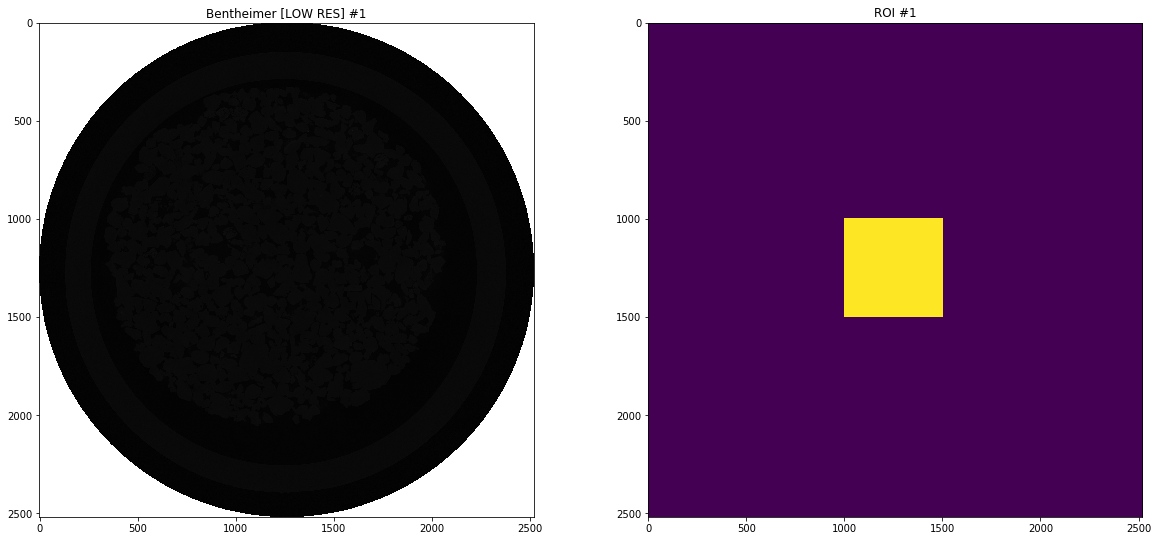

In [6]:
# Display the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:], cmap="gray")
plt.title("Bentheimer [LOW RES] #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(label_1)[12,:,:])        
plt.title("ROI #1")

In [7]:
z = 0
slice_ben = sitk.GetArrayViewFromImage(image_1)[z,:,:]
slice_ben.shape

(2520, 2520)

In [8]:
z = 0
ROI_ben = sitk.GetArrayViewFromImage(label_1)[z,:,:]

In [9]:
print(np.max(ROI_ben), np.min(ROI_ben))

255 0


In [10]:
slice_ben.dtype

dtype('float32')

## Preprocess the image

#### Extraction Settings

In [11]:
settings = {}
settings['label'] = 255

In [12]:
settings

{'label': 255}

In [13]:
type(settings)

dict

## Calculate features using original image

In [14]:
# Crop the image
# bb is the bounding box, upon which the image and mask are cropped
bb, correctedMask = imageoperations.checkMask(image_1, label_1, label=255)
if correctedMask is not None:
    label_1 = correctedMask
croppedImage, croppedMask = imageoperations.cropToTumorMask(image_1, label_1, bb)

In [15]:
bb

array([ 999, 1499,  999, 1499,    0,   39])

In [16]:
correctedMask

In [17]:
croppedImage

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x0000023719EF7F00> >

### Calculate Firstorder features

In [18]:
firstOrderFeatures = firstorder.RadiomicsFirstOrder(croppedImage, croppedMask, **settings)

# Set the features to be calculated
firstOrderFeatures.enableFeatureByName('Mean', True)
# firstOrderFeatures.enableAllFeatures()

In [19]:
# Print out the docstrings of the enabled features
print('Will calculate the following first order features: ')
for f in firstOrderFeatures.enabledFeatures.keys():
  print(f)
  print(getattr(firstOrderFeatures, 'get%sFeatureValue' % f).__doc__)

Will calculate the following first order features: 
Mean

    **8. Mean**

    .. math::
      \textit{mean} = \frac{1}{N_p}\displaystyle\sum^{N_p}_{i=1}{\textbf{X}(i)}

    The average gray level intensity within the ROI.
    


In [20]:
# Calculate the features and print(out result)
print('Calculating first order features...',)
result = firstOrderFeatures.execute()
print('done')

print('Calculated first order features: ')
for (key, val) in six.iteritems(result):
  print('  ', key, ':', val)

Calculating first order features...
done
Calculated first order features: 
   Mean : 11130.7636649854


### Calculate GLCM Features

In [21]:
glcmFeatures = glcm.RadiomicsGLCM(croppedImage, croppedMask, **settings)

# Set the features to be calculated
glcmFeatures.enableFeatureByName('SumEntropy', True)
#glcmFeatures.enableAllFeatures()

In [22]:
# Print out the docstrings of the enabled features
print('Will calculate the following GLCM features: ')
for f in glcmFeatures.enabledFeatures.keys():
  print(f)
  print(getattr(glcmFeatures, 'get%sFeatureValue' % f).__doc__)

Will calculate the following GLCM features: 
SumEntropy

    **23. Sum Entropy**

    .. math::

      \textit{sum entropy} = \displaystyle\sum^{2N_g}_{k=2}{p_{x+y}(k)\log_2\big(p_{x+y}(k)+\epsilon\big)}

    Sum Entropy is a sum of neighborhood intensity value differences.
    


In [23]:
# Calculate the features and print(out result)
print('Calculating GLCM features...',)
result = glcmFeatures.execute()
print('done')

print('Calculated GLCM features: ')
for (key, val) in six.iteritems(result):
  print('  ', key, ':', val)

Calculating GLCM features...
done
Calculated GLCM features: 
   SumEntropy : 6.309019986784536
